# Telco Customer Churn Analysis
Dataset:
Obtained from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn

## Problem Definition:
In the commercial world, it is important to understand customer retention and how the rate of customers leaving the business (churn) relates to characteristics exhibited by the members. By analysing and understanding the behaviour of customers, retention programs can be devised and targeted towards customers most likely to churn. This optimises the company's use of resources by allowing them to focus their energy where it is has the most effect.

This project applies a churn analysis to a telecommunications provider using data sourced from Kaggle. In this example, certain information about the customer, services they subscribed to and other variables were used to predict whether a customer was likely to to churn. The total project consisted of an exploratory analysis (Part 1) , initial classification model build to gain insights (Part 2) and a final robust ensemble classification model to predict whether a Telecommunication company customer is likely to churn (Part 3).

## Part 3:
Part 3 explores and evaluates different decision tree ensemble methods using the Scikit-Learn librar to produce a more powerful model. The following models were explored:

- Random Forest Classifier
- Adaptive Boosting Classifier
- Gradient Boosting Classifier



In [59]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report 

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc


# Define Functions:

def plot_confusion_matrix(target_predicted, target_test, class_names, clf_name):
    # Create Confusion Matrix
    matrix = confusion_matrix(target_test, target_predicted)
    df_confusion = pd.DataFrame(matrix, index=class_names, columns=class_names)
    # Create Heatmap
    sns.heatmap(df_confusion, annot=True, cmap="Blues", fmt=".0f")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.savefig('./cm_'+str(clf_name)+'.png')
    plt.show()
    plt.close()
    return df_confusion

def calculate_metrics(target_predicted, target_test):
    # Calculate Metrics
    precision = precision_score(target_test, target_predicted)
    recall = recall_score(target_test, target_predicted)
    f_one = f1_score(target_test, target_predicted)
    accuracy = accuracy_score(target_test, target_predicted)
    # Create Dataframe
    df_metrics = pd.DataFrame([{"Precision": precision, "Recall": recall, "F1 Score": f_one,  "Accuracy": accuracy}])
    return df_metrics

## Import Dataset

In [60]:
# Read in pre-processed data from csv

# Establish feature frame and target frame and set 'Churn' as the target feature and split
feature_frame = pd.read_csv("feature_frame.csv")
target_frame = pd.read_csv("target_frame.csv")

# Save column names
colnames = feature_frame.columns

feature_frame.head()

,SeniorCitizen,TotalCharges,MonthlyCharges,tenure,PaymentMethod_Electronic check,Contract_Two year,InternetService_Fiber optic,gender_Male,PaperlessBilling_Yes,TechSupport_Yes,...,Contract_One year,OnlineSecurity_Yes,DeviceProtection_Yes,MultipleLines_Yes,Dependents_Yes,StreamingMovies_Yes,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,PhoneService_Yes
0,0,593.30,65.6,9,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,1,1
1,0,542.40,59.9,9,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,1
2,1,280.85,73.9,4,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1237.85,98.0,13,1,0,1,1,1,0,...,0,0,1,0,0,1,1,0,0,1
4,1,267.40,83.9,3,0,0,1,0,1,1,...,0,0,0,0,0,0,1,0,1,1


## Split into training and test set
- Convert from Pandas dataframe to Numpy array
- Split into trainng and test set

In [61]:
# Convert from pandas to numpy
features = pd.DataFrame(feature_frame).to_numpy()
target = pd.DataFrame(target_frame).to_numpy()
target = np.ravel(target)

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=84)

# Random Forest Classifier

The first model tried was the Random Forest. This is an ensemble method in which all the predictors are decision trees aggregated using bagging (bootstrap aggregation). They introduce further randomness by altering the node splitting criteria. This means that they look for the best feature amongst a randomly selected subset of features. This makes the random forest useful in offering useful insights into the importance of each feature in determining the target variable. We will explore the feature importances below.

We begin by fitting a model with initial hyperparameter settings and making predictions.

In [62]:
# Fit Model
rnd_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
rnd_clf.fit(features_train, target_train)

# Make Predictions  
target_predicted = rnd_clf.predict(features_test)

## Model Evaluation

Again we evaluate the model using a confusion matrix, precision/recall and ROC curve

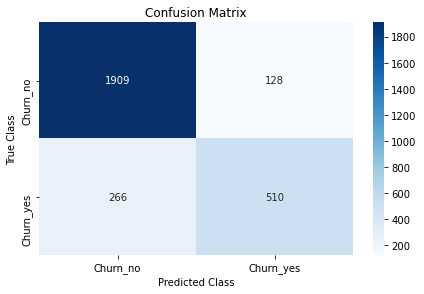

              precision    recall  f1-score   support

    Churn_no       0.88      0.94      0.91      2037
   Churn_yes       0.80      0.66      0.72       776

    accuracy                           0.86      2813
   macro avg       0.84      0.80      0.81      2813
weighted avg       0.86      0.86      0.86      2813



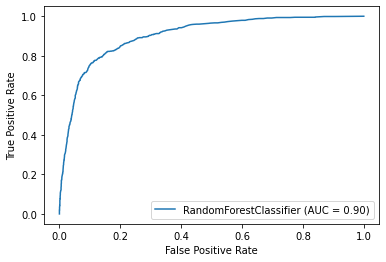

In [64]:
# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_rnd = plot_confusion_matrix(
    target_predicted, 
    target_test, 
    class_names, 
    "rnd_clf")

# Print Metrics
target_names = ["Churn_no", "Churn_yes"]
metrics_rnd1 = (classification_report(target_test, target_predicted, target_names=target_names))
print(metrics_rnd1)

# Plot ROC curve
plot_roc_curve(rnd_clf, features_test, target_test)
plt.show()    

The results already show a substantial improvement over the single decision tree classifier. Clearly the aggregation and added randomness improved the model. Let's now explore the feature importances.

## Feature Importances

In [65]:
# Print Feature Importances:
feature_importances =[]
for name, score in zip(colnames, rnd_clf.feature_importances_):
    print(name, '%.5f' % score)
    row=(name, score)
    feature_importances.append(row)

df_feature_importances = pd.DataFrame.from_records(feature_importances, columns=["Feature", "Importance"])

dfi = df_feature_importances.sort_values(by="Importance", ascending=False)

print(dfi)
dfi.to_csv("feature_importances.csv")

SeniorCitizen 0.23341
TotalCharges 0.14789
MonthlyCharges 0.13992
tenure 0.13542
PaymentMethod_Electronic check 0.03139
Contract_Two year 0.03272
InternetService_Fiber optic 0.02652
gender_Male 0.02299
PaperlessBilling_Yes 0.02175
TechSupport_Yes 0.02077
Partner_Yes 0.01900
OnlineBackup_Yes 0.01924
Contract_One year 0.01978
OnlineSecurity_Yes 0.01778
DeviceProtection_Yes 0.01785
MultipleLines_Yes 0.01773
Dependents_Yes 0.01623
StreamingMovies_Yes 0.01730
StreamingTV_Yes 0.01513
PaymentMethod_Credit card (automatic) 0.01095
PaymentMethod_Mailed check 0.00942
PhoneService_Yes 0.00680
                                  Feature  Importance
0                           SeniorCitizen    0.233413
1                            TotalCharges    0.147894
2                          MonthlyCharges    0.139925
3                                  tenure    0.135425
5                       Contract_Two year    0.032716
4          PaymentMethod_Electronic check    0.031386
6             InternetService_Fib

## Tuning of Hyperparameters:
The following sets of parameters will be considered:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

We continue to do a grid search to test what combination of these hyperparameters yields the best result.

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 15, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 10, 15, 20], 'bootstrap': [True, False]}


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(features_train, target_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  6.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

We can then report the results of the grid search:

In [20]:
# Report best parameters found
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

## Fit model with identified hyperparameters

We now train a new model with the above hyperparameters, make predictions and run our evaluation metrics.

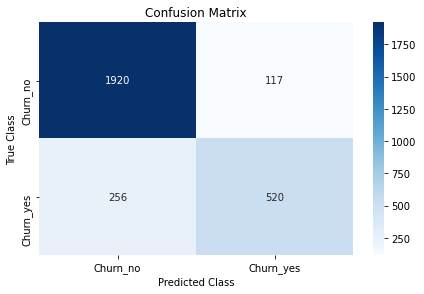

              precision    recall  f1-score   support

    Churn_no       0.88      0.94      0.91      2037
   Churn_yes       0.82      0.67      0.74       776

    accuracy                           0.87      2813
   macro avg       0.85      0.81      0.82      2813
weighted avg       0.86      0.87      0.86      2813



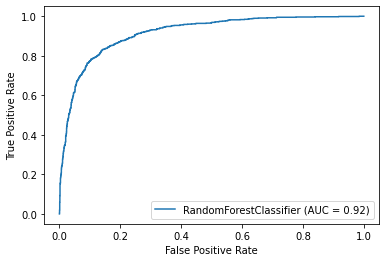

In [70]:
# Fit Model
rnd_clf2 = RandomForestClassifier(n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=80, bootstrap=True, n_jobs=-1)
rnd_clf2.fit(features_train, target_train)

# Make Predictions  
target_predicted2 = rnd_clf2.predict(features_test)

# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_rnd_clf2 = plot_confusion_matrix(
    target_predicted2, 
    target_test, 
    class_names, 
    "rnd_clf2")

# Print Metrics
target_names = ["Churn_no", "Churn_yes"]
metrics_rnd2 = (classification_report(target_test, target_predicted2, target_names=target_names))
print(metrics_rnd2)

# Plot ROC curve
plot_roc_curve(rnd_clf2, features_test, target_test)
plt.show()    

Tuning the hyperparameters appeared to have improved the model, as both the f1-score and AUC increased slightly. 

# Extra Trees Classifier

We can use "Extremely Randomised Trees" (Extra trees) for added randomness. As they randomise the threshold for each feature, it avoids the expensive search for the optimum threshold, and can improve training speeds.

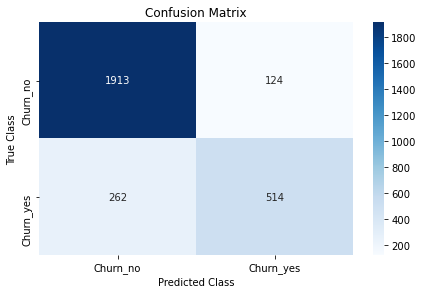

              precision    recall  f1-score   support

    Churn_no       0.88      0.94      0.91      2037
   Churn_yes       0.81      0.66      0.73       776

    accuracy                           0.86      2813
   macro avg       0.84      0.80      0.82      2813
weighted avg       0.86      0.86      0.86      2813



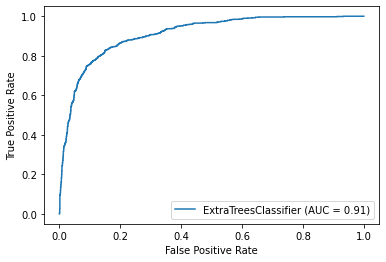

In [71]:
# Fit Extra Tree model:
from sklearn.ensemble import ExtraTreesClassifier

# Fit Model
extree = ExtraTreesClassifier(n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features='auto', max_depth=80, bootstrap=True, n_jobs=-1)
extree.fit(features_train, target_train)

# Make Predictions  
target_predicted3 = extree.predict(features_test)

# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_extree = plot_confusion_matrix(
    target_predicted3, 
    target_test, 
    class_names, 
    "extra trees")

# Print Metrics
target_names = ["Churn_no", "Churn_yes"]
metrics_extree = (classification_report(target_test, target_predicted3, target_names=target_names))
print(metrics_extree)

# Plot ROC curve
plot_roc_curve(extree, features_test, target_test)
plt.show()    

The results of the Extra Trees classifier were very similar to the Random Forest Classifier before hyperparameter tuning. 

# Adaptive Boosting (AdaBoost) Classifier

AdaBoosting trains predictors sequentially, focusing on misclassified training cases by the previous predictor. The first iteration is a base decision tree. The algorithm then increases the relative weights of the misclassified training cases and trains a second predictor. This can continue for a third predictor and so on.

## Fit Base tree

we begin by fitting the base decision tree:



In [72]:
# Set model hyperparameters
tree_depth = 4
min_in_leaf = 3

# Initialise model
classifier = DecisionTreeClassifier(
    max_features="auto",
    random_state=42,
    min_samples_leaf=min_in_leaf,
    max_depth=tree_depth)

# Fit model
tree_clf = classifier.fit(
    features_train, 
    target_train)

## Fit Boosted Trees

we then boost the base tree with sequential predictors.

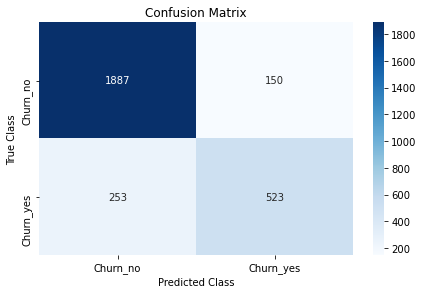

              precision    recall  f1-score   support

    Churn_no       0.88      0.93      0.90      2037
   Churn_yes       0.78      0.67      0.72       776

    accuracy                           0.86      2813
   macro avg       0.83      0.80      0.81      2813
weighted avg       0.85      0.86      0.85      2813



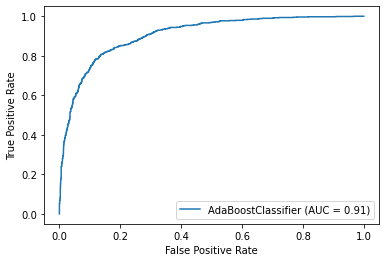

In [74]:
# Fit Model
ada_clf = AdaBoostClassifier(base_estimator=tree_clf, n_estimators=100, algorithm="SAMME", learning_rate=0.8)
ada_clf.fit(features_train, target_train)

# Make Predictions  
target_predicted4 = ada_clf.predict(features_test)

# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_ada = plot_confusion_matrix(
    target_predicted4, 
    target_test, 
    class_names, 
    "ada_clf")

# Print Metrics
target_names = ["Churn_no", "Churn_yes"]
metrics_ada1 = (classification_report(target_test, target_predicted4, target_names=target_names))
print(metrics_ada1)

# Plot ROC curve
plot_roc_curve(ada_clf, features_test, target_test)
plt.show()  

## Tune hyperparameters

In [41]:
# Use cross-validation to find good hyperparameter values
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': list(range(2, 100,2)), 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1]}
grid_search_cv = GridSearchCV(AdaBoostClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(features_train, target_train)

# Output result
grid_search_cv.best_estimator_

Fitting 3 folds for each of 245 candidates, totalling 735 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 735 out of 735 | elapsed:  3.1min finished


AdaBoostClassifier(learning_rate=1, n_estimators=12, random_state=42)

## Fit classifier with new hyperparameters

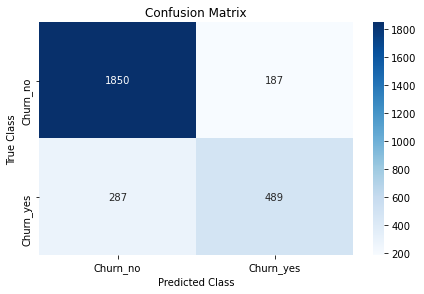

              precision    recall  f1-score   support

    Churn_no       0.87      0.91      0.89      2037
   Churn_yes       0.72      0.63      0.67       776

    accuracy                           0.83      2813
   macro avg       0.79      0.77      0.78      2813
weighted avg       0.83      0.83      0.83      2813



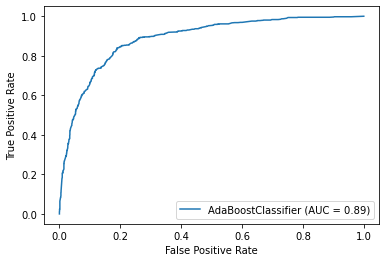

In [75]:
# Fit Model
ada_clf2 = AdaBoostClassifier(base_estimator=tree_clf, n_estimators=12, algorithm="SAMME", learning_rate=1)
ada_clf2.fit(features_train, target_train)

# Make Predictions  
target_predicted5 = ada_clf2.predict(features_test)

# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_tree = plot_confusion_matrix(
    target_predicted5, 
    target_test, 
    class_names, 
    "ada_clf2")

# Print Metrics
target_names = ["Churn_no", "Churn_yes"]
metrics_ada2 = (classification_report(target_test, target_predicted5, target_names=target_names))
print(metrics_ada2)

# Plot ROC curve
plot_roc_curve(ada_clf2, features_test, target_test)
plt.show()   

# Gradient Boosting Classifier

Gradient boosting also works sequentially like AdaBoost, however instead of updating weights of misclassified cases, Gradient Boosting calculates residual errors from the previous predicor and trains the new predictor on the residual errors.

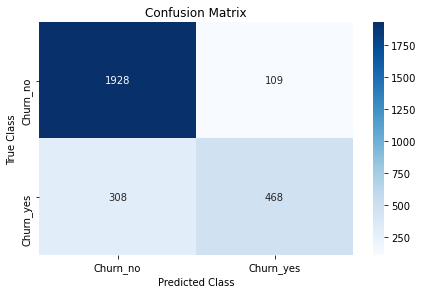

              precision    recall  f1-score   support

    Churn_no       0.86      0.95      0.90      2037
   Churn_yes       0.81      0.60      0.69       776

    accuracy                           0.85      2813
   macro avg       0.84      0.77      0.80      2813
weighted avg       0.85      0.85      0.84      2813



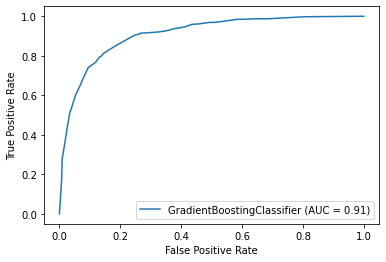

In [76]:
# Fit Model
gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=4, learning_rate=0.6, random_state=42)

model = gb_clf.fit(features_train, target_train)

# Make Predictions  
target_predicted6 = gb_clf.predict(features_test)

# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_gb = plot_confusion_matrix(
    target_predicted6, 
    target_test, 
    class_names, 
    "gb_clf")

# Print Metrics
target_names = ["Churn_no", "Churn_yes"]
metrics_gb = (classification_report(target_test, target_predicted6, target_names=target_names))
print(metrics_gb)

# Plot ROC curve
plot_roc_curve(gb_clf, features_test, target_test)
plt.show()   

## Tuning Hyperparameters

In [49]:
# Use cross-validation to find good hyperparameter values
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2, 10)), 'n_estimators': [6, 7, 8, 9], 'learning_rate':[0.35, 0.3, 0.4]}
grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(features_train, target_train)

# Output result
grid_search_cv.best_estimator_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:   25.6s finished


GradientBoostingClassifier(learning_rate=0.3, max_depth=4, n_estimators=6,
                           random_state=42)

## Fit New Model

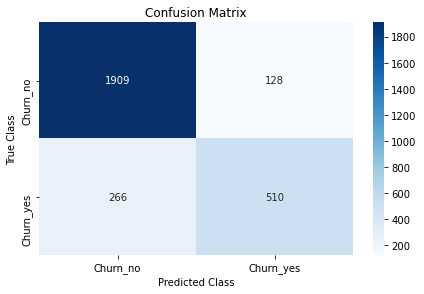

              precision    recall  f1-score   support

    Churn_no       0.88      0.94      0.90      2037
   Churn_yes       0.79      0.65      0.71       776

    accuracy                           0.86      2813
   macro avg       0.84      0.79      0.81      2813
weighted avg       0.85      0.86      0.85      2813



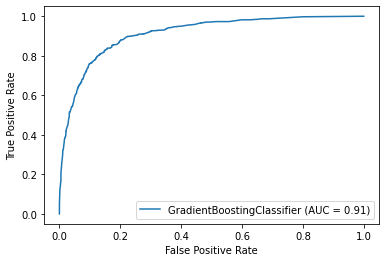

In [77]:
# Fit Model
gb_clf = GradientBoostingClassifier(max_depth=4, n_estimators=6, learning_rate=0.3, random_state=42)

model = gb_clf.fit(features_train, target_train)

# Make Predictions  
target_predicted7 = gb_clf.predict(features_test)

# Plot confusion matrix
class_names = ['Churn_no', 'Churn_yes']
cm_tree = plot_confusion_matrix(
    target_predicted, 
    target_test, 
    class_names, 
    "gb_clf2")

# Print Metrics
target_names = ["Churn_no", "Churn_yes"]
metrics_gb2 = (classification_report(target_test, target_predicted7, target_names=target_names))
print(metrics_gb2)

# Plot ROC curve
plot_roc_curve(gb_clf, features_test, target_test)
plt.show()   

# Summary of Models:

Below are the classification reports of all four models explored.

In [91]:

print("Random Forest Classifier:\n")
print(metrics_rnd2)
print("-----------------------------------------------------------")


print("Extra Trees Classifier:\n")
print(metrics_extree)
print("-----------------------------------------------------------")


print("Adaptive Boosting Classifier:\n")
print(metrics_ada2)
print("-----------------------------------------------------------")

print("Gradient Boosting Classifier:\n")
print(metrics_gb2)
print("-----------------------------------------------------------")

Random Forest Classifier:

              precision    recall  f1-score   support

    Churn_no       0.88      0.94      0.91      2037
   Churn_yes       0.82      0.67      0.74       776

    accuracy                           0.87      2813
   macro avg       0.85      0.81      0.82      2813
weighted avg       0.86      0.87      0.86      2813

-----------------------------------------------------------
Extra Trees Classifier:

              precision    recall  f1-score   support

    Churn_no       0.88      0.94      0.91      2037
   Churn_yes       0.81      0.66      0.73       776

    accuracy                           0.86      2813
   macro avg       0.84      0.80      0.82      2813
weighted avg       0.86      0.86      0.86      2813

-----------------------------------------------------------
Adaptive Boosting Classifier:

              precision    recall  f1-score   support

    Churn_no       0.87      0.91      0.89      2037
   Churn_yes       0.72      0.63 

It is apparent that the random forest and extra trees classifiers were better performing when evaluated on the test set, with random forest coming out on top by a hair.